In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def FV_N_m(PV, r_s, m, N):
    return PV*(1 + r_s/m)**(m*N)

def FV_c(PV, r_s, N):
    return PV*np.e**(r_s*N)

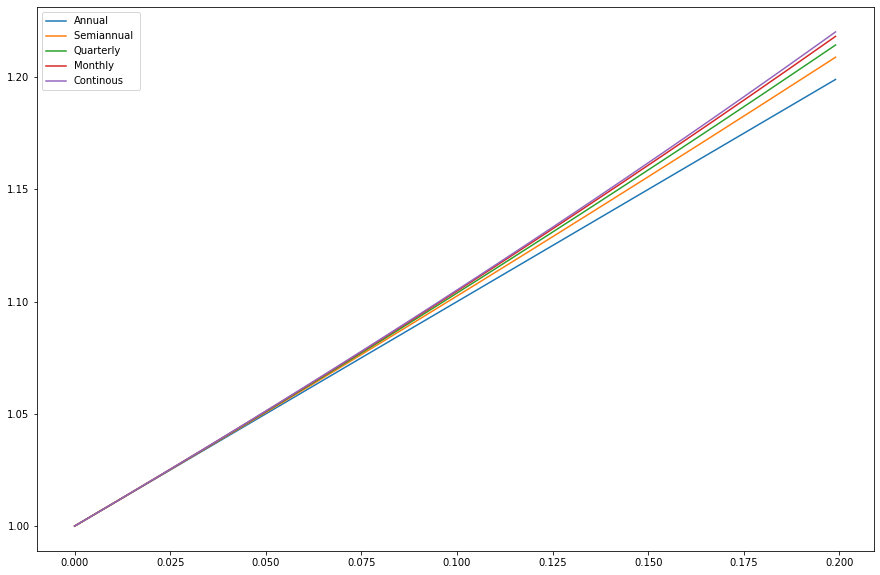

In [30]:
rates = np.arange(0, 0.2, .001)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
# ax.legend(title="Compounding Frequency")

ax.plot(rates, np.vectorize(FV_N_m)(1, rates, 1, 1), label="Annual")
ax.plot(rates, np.vectorize(FV_N_m)(1, rates, 2, 1), label="Semiannual ")
ax.plot(rates, np.vectorize(FV_N_m)(1, rates, 4, 1), label="Quarterly")
ax.plot(rates, np.vectorize(FV_N_m)(1, rates, 12, 1), label="Monthly")
ax.plot(rates, np.vectorize(FV_c)(1, rates, 1), label="Continous")

ax.legend()

plt.show()